In [1]:
import pandas as pd

train_df = pd.read_csv("data/IMDB/train.tsv", delimiter="\t")
test_df = pd.read_csv("data/IMDB/test.tsv", delimiter="\t")

print(f"Train size = {len(train_df)}")
print(f"Test size = {len(test_df)}")

Train size = 25000
Test size = 25000


In [2]:
#@title Начинаем классифицировать! { vertical-output: true, display-mode: "form" }
positive_words = 'love', 'great', 'best', 'wonderful' #@param {type:"raw"}
negative_words = 'worst', 'awful', '1/10', 'crap' #@param {type:"raw"}

positives_count = test_df.review.apply(lambda text: sum(word in text for word in positive_words))
negatives_count = test_df.review.apply(lambda text: sum(word in text for word in negative_words))
is_positive = positives_count > negatives_count
correct_count = (is_positive == test_df.is_positive).values.sum()

accuracy = correct_count / len(test_df)

print('Test accuracy = {:.2%}'.format(accuracy))
if accuracy > 0.71:
    from IPython.display import Image, display
    display(Image('https://s3.amazonaws.com/achgen360/t/rmmoZsub.png', width=500))

Test accuracy = 66.73%


In [3]:
positive_words = ('love', 'great', 'best', '7/10', '810', 'refreshing', 'wonderfully', 'funniest',
                  'erotic', 'excellent', 'carrey', 'flawless', 'hooked',
                  'superb', 'perfect', 'subtle', 'highly', 'vengeance',
                  'incredible', 'surprisingly', 'perfectly', 'rare', 'driven',
                  'finest', 'australia', 'touching', 'favorite', 'appreciated',
                  'chavez', 'enjoyable', 'scariest', '9/10', 'underrated',
                  '10/10', 'amazing', 'steals', 'tears', 'whoopi', 'delightful',
                  'flight', 'squirrel', 'units', 'kitty', 'enjoyed',
                  'dealing', 'bound')


negative_words = ('4/10', 'disappointment', '3/10', 'waste', 'poorly', 'worst', 'lacks',
                   '2/10','laughable', 'fails', 'awful', 'avoid', 'boring',
                   'disappointing', 'forgettable', '2/10', 'alright', 'unfunny',
                   'pointless', 'mediocre', 'lame', 'save', 'lousy', 'mst3k',
                   'horrible', 'badly', 'wooden', 'weak', 'baldwin', 'redeeming',
                   'mildly', 'dull', 'worse', 'mess', 'dreadful', 'britney',
                   '1/10', 'annoying', 'unwatchable', 'photo', 'poor', 'generous',
                   'sources', 'terrible', 'bored', 'boredom', 'insult', 'wonder',
                   'uninteresting', 'ridiculous', 'cardboard', 'unfortunately',
                   'miscast', 'ludicrous', 'refer', 'hoping', 'obnoxious', 'basically')


positives_count = test_df.review.apply(lambda text: sum(word in text for word in positive_words))
negatives_count = test_df.review.apply(lambda text: sum(word in text for word in negative_words))

is_positive = positives_count > negatives_count

correct_count = (is_positive == test_df.is_positive).values.sum()
print(f'correct count:{correct_count}, len(test_df):{len(test_df)}.')

accuracy = correct_count / len(test_df)
print('Test accuracy = {:.2%}'.format(accuracy))

correct count:18931, len(test_df):25000.
Test accuracy = 75.72%


In [4]:
import re

pattern = re.compile('<br\s?\/>|<br>')

print(train_df['review'].iloc[1])
print('------------------')

print(pattern.subn(' ', train_df['review'].iloc[1])[0])
print('------------------')

This show comes up with interesting locations as fast as the travel channel. It is billed as reality but in actuality it is pure prime time soap opera. It's tries to use exotic locales as a facade to bring people into a phony contest & then proceeds to hook viewers on the contestants soap opera style.<br /><br />It also borrows from an early CBS game show pioneer- Beat The Clock- by inventing situations for its contestants to try & overcome. Then it rewards the winner money. If they can spice it up with a little interaction between the characters, even better. While the game format is in slow motion versus Beat The Clock- the real accomplishment of this series is to escape reality. <br /><br />This show has elements of several types of successful past programs. Reality television, hardly, but if your hooked on the contestants, locale or contest, this is your cup of tea. If your not, this entire series is as I say, drivel dripping with gravy. It is another show hiding behind the reality

In [5]:
train_df['review'] = train_df['review'].apply(lambda text: pattern.subn(' ', text)[0])
test_df['review'] = test_df['review'].apply(lambda text: pattern.subn(' ', text)[0])

In [6]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\grayni\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
tokenizer = nltk.tokenize.WordPunctTokenizer()
mystopwords = stopwords.words("english") + ['the', 'a']

def remove_punktuation(text):
    return re.sub(r'[^\w\s\d]', '', text)

def lower_case(text):
    text = str(text).lower()
    return ' '.join(tokenizer.tokenize(text))

def remove_stopwords(text):
    text = tokenizer.tokenize(text)
    text = [w for w in text if w not in mystopwords]
    return ' '.join(text)

def normalize(text):
    text = remove_punktuation(text)
    text = lower_case(text)
    text = remove_stopwords(text)
    return text

In [8]:
train_df['review'] = train_df['review'].apply(normalize)
test_df['review'] = test_df['review'].apply(normalize)

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

dummy_data = ['The movie was excellent',
              'the movie was awful']

dummy_matrix = vectorizer.fit_transform(dummy_data)

print(dummy_matrix.toarray())
print(vectorizer.get_feature_names_out())

[[0 1 1 1 1]
 [1 0 1 1 1]]
['awful' 'excellent' 'movie' 'the' 'was']


In [10]:
vectorizer = CountVectorizer()
vectorizer.fit(train_df['review'].values)

CountVectorizer()

In [11]:
vectorizer.get_feature_names_out()

array(['00', '000', '0000000000001', ..., 'überannoying', 'überspy',
       'üvegtigris'], dtype=object)

In [12]:
vectorizer.transform([train_df['review'].iloc[3]])

<1x111517 sparse matrix of type '<class 'numpy.int64'>'
	with 157 stored elements in Compressed Sparse Row format>

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

dummy_data = ['The movie was excellent',
              'the movie was awful']
dummy_labels = [1, 0]

vectorizer = CountVectorizer()
classifier = LogisticRegression()

model = Pipeline([
    ('vectorizer', vectorizer),
    ('classifier', classifier)
])

model.fit(dummy_data, dummy_labels)

print(vectorizer.get_feature_names_out())
print(classifier.coef_)

['awful' 'excellent' 'movie' 'the' 'was']
[[-0.40104279  0.40104279  0.          0.          0.        ]]


In [14]:
model.fit(train_df['review'], train_df['is_positive'])

C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('classifier', LogisticRegression())])

In [15]:
from sklearn.metrics import accuracy_score

def eval_model(model, test_df):
    preds = model.predict(test_df['review'])
    print('Test accuracy = {:.2%}'.format(accuracy_score(test_df['is_positive'], preds)))

eval_model(model, test_df)

Test accuracy = 86.99%


In [16]:
import eli5
eli5.show_weights(classifier, vec=vectorizer, top=10)

C:\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [17]:
print('Positive' if test_df['is_positive'].iloc[1] else 'Negative')
eli5.show_prediction(classifier, test_df['review'].iloc[1], vec=vectorizer,
                     targets=['positive'], target_names=['negative', 'positive'])

Positive


In [20]:
print('Positive' if test_df['is_positive'].iloc[6] else 'Negative')
eli5.show_prediction(classifier, test_df['review'].iloc[6], vec=vectorizer,
                     targets=['positive'], target_names=['negative', 'positive'])

Negative


C:\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [21]:
import numpy as np

preds_vount_vect = model.predict(test_df['review'])

incorrect_pred_index = np.random.choice(np.where(preds_vount_vect != test_df['is_positive'])[0])

eli5.show_prediction(classifier,
                     test_df['review'].iloc[incorrect_pred_index],
                     vec=vectorizer,
                     targets=['positive'],
                     target_names=['negative', 'positive'])

C:\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
classifier = LogisticRegression()

model = Pipeline([
    ('vectorizer', vectorizer),
    ('classifier', classifier)
])

model.fit(train_df['review'], train_df['is_positive'])

eval_model(model, test_df)

Test accuracy = 88.58%


In [23]:
eli5.show_weights(classifier, vec=vectorizer, top=40)

C:\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Weight?,Feature
+7.220,great
+6.295,excellent
+5.262,best
+4.709,perfect
+4.676,wonderful
+4.232,amazing
+4.230,well
+4.209,favorite
+4.096,love
+3.857,loved


In [24]:
print('Positive' if test_df['is_positive'].iloc[1] else 'Negative')

eli5.show_prediction(classifier,
                     test_df['review'].iloc[1],
                     vec=vectorizer,
                     targets=['positive'],
                     target_names=['negative', 'positive'])

Positive


C:\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [25]:
print('Positive' if test_df['is_positive'].iloc[6] else 'Negative')

eli5.show_prediction(classifier,
                     test_df['review'].iloc[6],
                     vec=vectorizer,
                     targets=['positive'],
                     target_names=['negative', 'positive'])

Negative


C:\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [26]:
vectorizer = TfidfVectorizer(ngram_range=(1, 2))
classifier = LogisticRegression()

model = Pipeline([
    ('vectorizer', vectorizer),
    ('classifier', classifier)
])

model.fit(train_df['review'], train_df['is_positive'])

eval_model(model, test_df)

Test accuracy = 88.28%


In [27]:
vectorizer = TfidfVectorizer(ngram_range=(1, 3))
classifier = LogisticRegression()

model = Pipeline([
    ('vectorizer', vectorizer),
    ('classifier', classifier)
])

model.fit(train_df['review'], train_df['is_positive'])

eval_model(model, test_df)

Test accuracy = 87.55%


In [28]:
vectorizer = TfidfVectorizer(ngram_range=(1, 5))
classifier = LogisticRegression()

model = Pipeline([
    ('vectorizer', vectorizer),
    ('classifier', classifier)
])

model.fit(train_df['review'], train_df['is_positive'])

eval_model(model, test_df)

Test accuracy = 86.62%


In [29]:
vectorizer = TfidfVectorizer(ngram_range=(2, 6), max_features=20000, analyzer='char')
classifier = LogisticRegression()

model = Pipeline([
    ('vectorizer', vectorizer),
    ('classifier', classifier)
])

model.fit(train_df['review'], train_df['is_positive'])

eval_model(model, test_df)

Test accuracy = 87.56%


In [30]:
print('Positive' if test_df['is_positive'].iloc[1] else 'Negative')

eli5.show_prediction(classifier,
                     test_df['review'].iloc[1],
                     vec=vectorizer,
                     targets=['positive'],
                     target_names=['negative', 'positive'])

Positive


C:\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [31]:
vectorizer = TfidfVectorizer(ngram_range=(3, 7), analyzer='char')
classifier = LogisticRegression()

model = Pipeline([
    ('vectorizer', vectorizer),
    ('classifier', classifier)
])

model.fit(train_df['review'], train_df['is_positive'])

eval_model(model, test_df)

Test accuracy = 88.33%


In [32]:
print('Positive' if test_df['is_positive'].iloc[1] else 'Negative')

eli5.show_prediction(classifier,
                     test_df['review'].iloc[1],
                     vec=vectorizer,
                     targets=['positive'],
                     target_names=['negative', 'positive'])

Positive


C:\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [33]:
import spacy
from spacy import displacy

nlp = spacy.load('en_core_web_sm', disable=['parser'])

docs = [doc for doc in nlp.pipe(train_df.review.values[:50])]

In [34]:
for token in docs[0]:
    print(token.text, token.lemma_, token.ent_iob_, token.ent_type_)

dreamgirls dreamgirl B ORG
despite despite O 
fistful fistful O 
tony tony O 
wins win O 
incredibly incredibly O 
weak weak O 
year year B DATE
broadway broadway O 
never never O 
one one O 
would would O 
call call O 
jewel jewel B PERSON
crown crown I PERSON
stage stage O 
musicals musical O 
however however O 
say say O 
right right O 
cinematic cinematic O 
hands hand O 
could could O 
fleshed fleshed O 
polished polished O 
something something O 
worthwhile worthwhile O 
onscreen onscreen O 
unfortunately unfortunately O 
transfers transfer O 
screen screen O 
basically basically O 
slavishly slavishly O 
faithful faithful O 
version version O 
stage stage O 
hit hit O 
inherent inherent O 
weaknesses weakness O 
intact intact O 
first first B ORDINAL
score score O 
never never O 
one one O 
strong strong O 
points point O 
production production O 
film film O 
change change O 
factor factor O 
lots lot O 
songs song O 
perhaps perhaps O 
many many O 
especially especially O 
mem

In [35]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\grayni\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [36]:
def lemmatized_words(text):
    text_lem = [lemmatizer.lemmatize(word) for word in tokenizer.tokenize(text)]
    return ' '.join(word for word in text_lem)

In [37]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\grayni\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [38]:
train_df['lemmatized'] = train_df['review'].apply(lemmatized_words)
test_df['lemmatized'] = test_df['review'].apply(lemmatized_words)

In [39]:
vectorizer = TfidfVectorizer(ngram_range=(1, 2))
classifier = LogisticRegression()

model = Pipeline([
    ('vectorizer', vectorizer),
    ('classifier', classifier)
])

model.fit(train_df['lemmatized'], train_df['is_positive'])

eval_model(model, test_df)

Test accuracy = 87.97%


In [40]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

In [41]:
def stemmed_words(text):
    text_stem = [stemmer.stem(word) for word in tokenizer.tokenize(text)]
    return ' '.join(word for word in text_stem)

In [42]:
train_df['stemmed'] = train_df['review'].apply(stemmed_words)
test_df['stemmed'] = test_df['review'].apply(stemmed_words)

In [43]:
model = Pipeline([
    ('vectorizer', vectorizer),
    ('classifier', classifier)
])

model.fit(train_df['stemmed'], train_df['is_positive'])

eval_model(model, test_df)

Test accuracy = 82.37%


In [44]:
train_df['review']

0        dreamgirls despite fistful tony wins incredibl...
1        show comes interesting locations fast travel c...
2        simply love movie also love ramones sorta bias...
3        spoilers ahead want call would almost recommen...
4        alltime favorite movie seen many movies one be...
                               ...                        
24995    big fan movie usual reasons think travolta win...
24996    im going bother plot synopsis since know movie...
24997    movie dont know would take indellible characte...
24998    saw film dvd yesterday gobsmacked flabbergaste...
24999    disappointment none nuance original brits seem...
Name: review, Length: 25000, dtype: object

<BarContainer object of 253 artists>

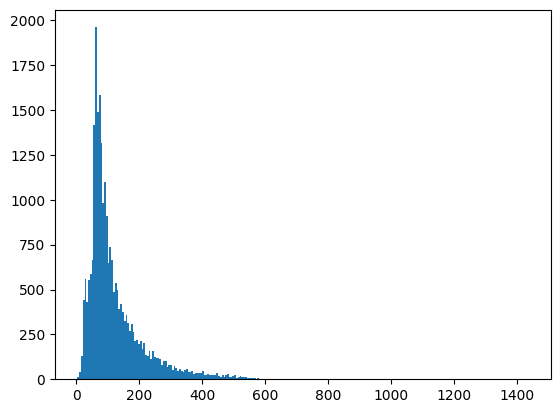

In [45]:
%matplotlib inline
import matplotlib.pyplot as plt

_, _, hist = plt.hist(train_df.review.apply(lambda text: len(text.split())), bins='auto')
hist

In [46]:
from collections import Counter

words_counter = Counter((word for text in train_df.review for word in text.lower().split()))

word2idx = {
    '': 0,
    '<unk>': 1
}
for word, count in words_counter.most_common():
    if count < 10:
        break

    word2idx[word] = len(word2idx)

print('Words count', len(word2idx))

Words count 20441


In [48]:
def convert(texts, word2idx, max_text_len):
    data = np.zeros((len(texts), max_text_len), dtype=np.int64)

    for inx, text in enumerate(texts):
        result = []
        for word in text.split():
            if word in word2idx:
                result.append(word2idx[word])
        padding = [0]*(max_text_len - len(result))
        data[inx] = np.array(padding + result[-max_text_len:], dtype=np.int64)
    return data

X_train = convert(train_df.review, word2idx, 1000)
X_test = convert(test_df.review, word2idx, 1000)

In [49]:
import tensorflow as tf
tf.__version__

'2.10.0'

In [50]:
import tensorflow as tf
from keras import Sequential
from keras.layers import Dense, Embedding, GlobalMaxPooling1D, Dropout

In [51]:
model = Sequential([
    Embedding(input_dim=len(word2idx), output_dim=64, input_shape=(X_train.shape[1],)),
    GlobalMaxPooling1D(),
    Dense(units=10, activation='relu'),
    Dense(units=10, activation='relu'),

    Dense(units=1, activation='sigmoid')
])

model.summary()
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1000, 64)          1308224   
                                                                 
 global_max_pooling1d (Globa  (None, 64)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 10)                650       
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,308,995
Trainable params: 1,308,995
Non-trainable params: 0
______________________________________________

In [52]:
model.fit(X_train,
          train_df.is_positive,
          batch_size=128,
          epochs=10,
          validation_data=(X_test, test_df.is_positive))

Epoch 1/10
196/196 [==============================] - 5s 13ms/step - loss: 0.5725 - accuracy: 0.7908 - val_loss: 0.3532 - val_accuracy: 0.8558
Epoch 2/10
196/196 [==============================] - 2s 12ms/step - loss: 0.2702 - accuracy: 0.8904 - val_loss: 0.2824 - val_accuracy: 0.8802
Epoch 3/10
196/196 [==============================] - 2s 12ms/step - loss: 0.1690 - accuracy: 0.9380 - val_loss: 0.2828 - val_accuracy: 0.8823
Epoch 4/10
196/196 [==============================] - 2s 12ms/step - loss: 0.0985 - accuracy: 0.9688 - val_loss: 0.3034 - val_accuracy: 0.8801
Epoch 5/10
196/196 [==============================] - 2s 12ms/step - loss: 0.0499 - accuracy: 0.9882 - val_loss: 0.3395 - val_accuracy: 0.8786
Epoch 6/10
196/196 [==============================] - 2s 12ms/step - loss: 0.0223 - accuracy: 0.9968 - val_loss: 0.3773 - val_accuracy: 0.8756
Epoch 7/10
196/196 [==============================] - 2s 12ms/step - loss: 0.0095 - accuracy: 0.9994 - val_loss: 0.4125 - val_accuracy: 0.8746

In [53]:
model.evaluate(X_test, test_df.is_positive)

782/782 [==============================] - 2s 2ms/step - loss: 0.4854 - accuracy: 0.8719


[0.48541682958602905, 0.8718799948692322]

In [54]:
X_train = convert(train_df.lemmatized, word2idx, 1000)
X_test = convert(test_df.lemmatized, word2idx, 1000)

In [55]:
model.fit(X_train,
          train_df.is_positive,
          batch_size=128,
          epochs=10,
          validation_data=(X_test, test_df.is_positive))

Epoch 1/10
196/196 [==============================] - 3s 13ms/step - loss: 0.0253 - accuracy: 0.9920 - val_loss: 0.5543 - val_accuracy: 0.8574
Epoch 2/10
196/196 [==============================] - 2s 12ms/step - loss: 0.0049 - accuracy: 0.9993 - val_loss: 0.5716 - val_accuracy: 0.8610
Epoch 3/10
196/196 [==============================] - 2s 12ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.5921 - val_accuracy: 0.8610
Epoch 4/10
196/196 [==============================] - 2s 12ms/step - loss: 5.9199e-04 - accuracy: 1.0000 - val_loss: 0.6082 - val_accuracy: 0.8608
Epoch 5/10
196/196 [==============================] - 2s 12ms/step - loss: 4.1809e-04 - accuracy: 1.0000 - val_loss: 0.6219 - val_accuracy: 0.8614
Epoch 6/10
196/196 [==============================] - 2s 12ms/step - loss: 3.1904e-04 - accuracy: 1.0000 - val_loss: 0.6340 - val_accuracy: 0.8615
Epoch 7/10
196/196 [==============================] - 2s 12ms/step - loss: 2.5147e-04 - accuracy: 1.0000 - val_loss: 0.6451 - val_

In [56]:
model.evaluate(X_test, test_df.is_positive)

782/782 [==============================] - 2s 2ms/step - loss: 0.6758 - accuracy: 0.8614


[0.6758133769035339, 0.8614400029182434]

In [57]:
X_train = convert(train_df.stemmed, word2idx, 1000)
X_test = convert(test_df.stemmed, word2idx, 1000)

In [58]:
model.fit(X_train,
          train_df.is_positive,
          batch_size=128,
          epochs=10,
          validation_data=(X_test, test_df.is_positive))

Epoch 1/10
196/196 [==============================] - 3s 14ms/step - loss: 0.2735 - accuracy: 0.8997 - val_loss: 0.4270 - val_accuracy: 0.8201
Epoch 2/10
196/196 [==============================] - 2s 12ms/step - loss: 0.1118 - accuracy: 0.9606 - val_loss: 0.5408 - val_accuracy: 0.8167
Epoch 3/10
196/196 [==============================] - 2s 12ms/step - loss: 0.0553 - accuracy: 0.9844 - val_loss: 0.6392 - val_accuracy: 0.8106
Epoch 4/10
196/196 [==============================] - 2s 12ms/step - loss: 0.0246 - accuracy: 0.9955 - val_loss: 0.7173 - val_accuracy: 0.8098
Epoch 5/10
196/196 [==============================] - 2s 12ms/step - loss: 0.0104 - accuracy: 0.9992 - val_loss: 0.7891 - val_accuracy: 0.8086
Epoch 6/10
196/196 [==============================] - 2s 12ms/step - loss: 0.0049 - accuracy: 0.9998 - val_loss: 0.8413 - val_accuracy: 0.8099
Epoch 7/10
196/196 [==============================] - 2s 12ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.8895 - val_accuracy: 0.8092

In [59]:
model.evaluate(X_test, test_df.is_positive)

782/782 [==============================] - 2s 2ms/step - loss: 0.9931 - accuracy: 0.8087


[0.9931359887123108, 0.80867999792099]